In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# read csv from drive
import numpy as np
import pandas as pd
import io
import csv
import matplotlib.pyplot as plt

# data processing

In [3]:
# import all data from 2021
data_path = "/content/drive/My Drive/ Shriyam-Project/vaers.csv"
vaers_data = pd.read_csv(data_path)
# print(vaers_data.keys())
# keys : 'VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
      #  'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE',
      #  'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 
      #  'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
      #  'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
      #  'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 
      #  'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
      #  'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT',
      #  'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1','SYMPTOM2',
      #  'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 
      #  'SYMPTOM5', 'SYMPTOMVERSION5', 'date', 'date.vax', 'dur', 
      #  'Allergic_his', 'diabetes', 'hypertension', 'arthritis', 'Asthma', 
      #  'Migraine', 'copd', 'Anxiety', 'obesity', 'depression', 
      #  'Thyroid', 'Anemia', 'Dementia', 'Cancer', 'Kidney',
      #  'Hyperlipidemia', 'CVD', 'AF', 'othermeds', 'currill',
      #  'allergies','sex', 'disable', 'manu'

############# symptom dictionary ###################

#get all symptoms and make dictionary
symptom_list = []
symptom_list.extend(vaers_data[vaers_data.keys()[42]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[44]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[46]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[48]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[50]].to_list())
# unique sympton list
u_symptom_list = list(set(symptom_list))
print(len(u_symptom_list))
u_symptom_list = [x for x in u_symptom_list if x == x]
print(len(u_symptom_list))
# symptom dictionary
symptom_dict = {u_symptom_list[i]: i for i in range(len(u_symptom_list))}

num_symptom = len(u_symptom_list)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,19,22,30,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


5488
5487


In [ ]:
#get vaers_id
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
unique_id = list(set(Vaers_id))

# get days in hospitcal
Vaers_hostday = vaers_data[vaers_data.keys()[21]].to_list()
# get symptom status
Vaers_symptom_1 = vaers_data[vaers_data.keys()[42]].to_list()
Vaers_symptom_2 = vaers_data[vaers_data.keys()[44]].to_list()
Vaers_symptom_3 = vaers_data[vaers_data.keys()[46]].to_list()
Vaers_symptom_4 = vaers_data[vaers_data.keys()[48]].to_list()
Vaers_symptom_5 = vaers_data[vaers_data.keys()[50]].to_list()


# list of hospitalized days
hospitalized_status = []
# list of symptom index for each patient - according to symptom dictionary
symptom_status = []
for i in range(len(unique_id)):
  print(i)
  # get id
  temp_id = unique_id[i]
  # find index of Vaers_id that gives the same id
  ind_id = [i for i, x in enumerate(Vaers_id) if x == temp_id]
  # find symptom
  t_symptom = []
  # hospital days
  hospital_day = 0
  for j in range(len(ind_id)):
    # symptoms
    t_symptom.append(Vaers_symptom_1[ind_id[j]])
    t_symptom.append(Vaers_symptom_2[ind_id[j]])
    t_symptom.append(Vaers_symptom_3[ind_id[j]])
    t_symptom.append(Vaers_symptom_4[ind_id[j]])
    t_symptom.append(Vaers_symptom_5[ind_id[j]])
    t_symptom = [x for x in t_symptom if x == x]
    # days in hospital
    t_hostday = Vaers_hostday[ind_id[j]]
    if t_hostday == 'nan':
      hospital_day = max(hospital_day ,0)
    else:
      hospital_day = max(hospital_day ,t_hostday)
  # number of days hospitalized
  hospitalized_status.append(hospital_day)
  # symptom list
  unique_symptom = list(set(t_symptom))
  symptom_idx = np.zeros([len(unique_symptom), ])
  for k in range(len(unique_symptom)):
    symptom_idx[k] = symptom_dict.get(unique_symptom[k])
  symptom_status.append(symptom_idx)

In [5]:
# total number of data 
num_total = len(unique_id)
# number of theta dimension
theta_dim = len(u_symptom_list) + 1  # with intercept
# split to train and test data
# train data: 80000
# test data: 27882
num_train = 80000
num_test = 27805

import random

random.seed(3) # fix seed
ind_rand = np.array(range(num_train + num_test))
random.shuffle(ind_rand)

# set number of hospitalized date as np array
num_hospitalized_day = np.array(hospitalized_status)
# split to train and test
train_num_hospitalized_day = num_hospitalized_day[ind_rand[0:num_train]]
test_num_hospitalized_day = num_hospitalized_day[ind_rand[num_train: num_train+num_test]]

# split symptom list to train and test
train_symptoms = []
test_symptoms = []
for i in range(num_train):
  train_symptoms.append(symptom_status[ind_rand[i]])
for i in range(num_test):
  test_symptoms.append(symptom_status[ind_rand[i+num_train]])



# sparse PCA

In [6]:
# import things
from sklearn.decomposition import SparsePCA 
import seaborn as sns


In [7]:
# all hospital days
num_host_day = np.unique(train_num_hospitalized_day)
class_host = np.zeros(train_num_hospitalized_day.shape)
class_host[train_num_hospitalized_day > 0] = 1
a = np.argwhere(class_host).reshape(-1)
print(a.shape)

(3952,)


In [8]:
# generate X_symptom (num_train, num_feature)
X_symptom = np.zeros([a.shape[0], num_symptom])
jj = 0
for i in a:
  t_symptom = np.zeros([num_symptom, ])
  # print(train_symptoms[i])
  t_symptom[train_symptoms[i].astype('int')] = 1
  X_symptom[jj, :] = t_symptom
  jj += 1


In [9]:
num_main_symptom = 5
spca = SparsePCA(n_components=num_main_symptom)
Z_symptom = spca.fit_transform(X_symptom) 

In [ ]:
# get all weights
E_mat = np.diag(np.ones([num_symptom, ]))
Weights_symptom = spca.transform(E_mat)

In [ ]:
# find top k-symptoms
k_symptoms = 10
determinant_symptoms = []
for i in range(num_main_symptom):
  ind_k = np.argpartition(-np.abs(Weights_symptom[:, i]), k_symptoms)
  ind_k = ind_k[:k_symptoms]
  for j in range(k_symptoms):
    for symptom, ind_symptom in symptom_dict.items():
      if ind_symptom == ind_k[j]:
        # print(symptom)
        determinant_symptoms.append(symptom)

# unique it
determinant_symptoms = list(set(determinant_symptoms))
print(determinant_symptoms)
print(len(determinant_symptoms))

['Fatigue', 'Death', 'Blood potassium normal', 'Blood creatinine normal', 'Haemoglobin decreased', 'Blood test', 'Magnetic resonance imaging', 'Vomiting', 'Chills', 'Blood glucose normal', 'Nausea', 'Unevaluable event', 'Pyrexia', 'Cerebrovascular accident', 'Blood chloride normal', 'Computerised tomogram', 'Dyspnoea', 'White blood cell count normal', 'Diarrhoea', 'Pain', 'Platelet count normal', 'Electrocardiogram', 'Blood sodium normal', 'Dizziness', 'Asthenia', 'Headache']
26


In [ ]:
# find top k-symptoms
k_symptoms = 5
determinant_symptoms = []
for i in range(num_main_symptom):
  ind_k = np.argpartition(-np.abs(Weights_symptom[:, i]), k_symptoms)
  ind_k = ind_k[:k_symptoms]
  for j in range(k_symptoms):
    for symptom, ind_symptom in symptom_dict.items():
      if ind_symptom == ind_k[j]:
        # print(symptom)
        determinant_symptoms.append(symptom)

# unique it
determinant_symptoms = list(set(determinant_symptoms))
print(determinant_symptoms)
print(len(determinant_symptoms))

['Blood glucose normal', 'Death', 'Nausea', 'Pyrexia', 'Pain', 'Cerebrovascular accident', 'Platelet count normal', 'Blood potassium normal', 'Computerised tomogram', 'Haemoglobin decreased', 'Chills', 'Dyspnoea', 'Blood test', 'Magnetic resonance imaging', 'Vomiting', 'Blood sodium normal']
16


 If we find the top 10*6(number of PCA components) symptoms that contribute most to hospitalization, there will be 28 unique symptoms

If we find the top 5*6(number of PCA components) symptoms that contribute most to hospitalization, there will be 16 unique symptoms

## PCA using for linear regression predict duration of hospitialization



In [ ]:
def linear_sparse_train(symptom, hostday, num_dim, batch_size = 40, reg_lambda = 0.01, learning_rate = 0.00001, max_iter = 1000):
  # symptom - array of PCA symptom
  # hostday - array of number of hospitalized day
  # num_dim - theta dimension
  # batch_size
  # n_train - number of training sample
  # reg_lambda - an l1 norm regularization for sparse constraint

  # initialize theta
  theta = np.random.normal(size=[num_dim, ])
  # theta = np.zeros([num_dim, ])

  # number of batches:
  n_batch = int(n_train / batch_size)

  i = 0
  # iteration
  while True:
    i += 1
    print(i)
    # randomly get index to set batch 
    ind_train = list(range(n_train))
    random.shuffle(ind_train)
    # iterate
    old_theta = theta
    for j in range(n_batch):
      t_theta = np.zeros([num_dim, ])
      train_x = np.zeros([batch_size, num_dim])
      train_x[:, 0:num_dim] = symptom[ind_train[j*batch_size:(j+1)*batch_size], :]
      train_x[:, num_dim] = 1
      train_y = hostday[ind_train[j*batch_size:(j+1)*batch_size]]
      # update theta
      grad = (theta.T.dot(train_x) - train_y) * theta + reg_lambda * np.sign(theta)
      theta = theta - learning_rate * (grad/batch_size)
      # print(np.linalg.norm(theta - old_theta))
    print(theta)
    if np.linalg.norm(old_theta - theta) < 1e-6:
      print(np.linalg.norm(old_theta - theta))
      return theta
    if i > max_iter:
      return theta

## PCA using for linear classification


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### handle imbalanced data with undersampling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# generate index of hospitalized / nonhospitalized
# index - hospitalized
ind_1 = np.argwhere(train_num_hospitalized_day).reshape(-1)
# index - no hospitalization
ind_0 = np.argwhere(train_num_hospitalized_day == 0).reshape(-1)

In [ ]:
# linear regression
lr = LogisticRegression(random_state=0, warm_start=True)

In [ ]:
# undersample ind_0
# random.seed(2)
random.seed(4)
num_hospitalized = ind_1.shape[0]
temp_ind_0 = ind_0
np.random.shuffle(temp_ind_0)




In [ ]:
# number of sample sets
n_set = int(temp_ind_0.shape[0]/num_hospitalized)

for i in range(n_set):
  train_ind = np.zeros([2*num_hospitalized, ])
  train_ind[0:num_hospitalized] = ind_1
  train_ind[num_hospitalized:2*num_hospitalized] = temp_ind_0[i*num_hospitalized:(i+1)*num_hospitalized]
  np.random.shuffle(train_ind)
  X_symptom = np.zeros([2*num_hospitalized, num_symptom])
  for j in range(2*num_hospitalized):
    t_symptom = np.zeros([num_symptom, ])
    t_symptom[train_symptoms[train_ind[i].astype('int')].astype('int')] = 1
    X_symptom[i, :] = t_symptom
  
  # get the PCA
  Z_symptom = spca.transform(X_symptom)
  
  class_host = np.zeros([2*num_hospitalized, ])
  class_host = train_num_hospitalized_day[train_ind.astype('int')]
  class_host[class_host > 0] = 1

  # fit
  lr.fit(Z_symptom, class_host)

In [ ]:
# get weight
weight_host = lr.coef_[0, :].reshape(1, -1)
weight_host = np.sum(weight_host * Weights_symptom, axis = 1)

# find top k-symptoms
k_symptoms = 20
determinant_symptoms = []

ind_k = np.argpartition(-np.abs(weight_host), k_symptoms)
ind_k = ind_k[:k_symptoms]
for j in range(k_symptoms):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_k[j]:
      determinant_symptoms.append(symptom)

print(determinant_symptoms)
print(len(determinant_symptoms))

['Dizziness', 'Death', 'Dyspnoea', 'Pain', 'Magnetic resonance imaging', 'Pyrexia', 'Blood test', 'Computerised tomogram', 'Vomiting', 'Fatigue', 'Nausea', 'Chills', 'Chest pain', 'Pulmonary embolism', 'Cough', 'Asthenia', 'SARS-CoV-2 test positive', 'Diarrhoea', 'SARS-CoV-2 test negative', 'COVID-19']
20


'Pyrexia', 

'Pain', 

'Chills', 

'Nausea', 

'Fatigue', 

'Death', 

'Myalgia', 

'Arthralgia', 

'Limb injury', 

'Heavy menstrual bleeding', 

'Respiratory depression', 

'Pain in extremity', 

'Gallbladder enlargement', 

'Tachycardia', 

'SARS-CoV-2 test negative', 

'Product contamination physical', 

'Chronic inflammatory demyelinating polyradiculoneuropathy', 

'Aspartate aminotransferase decreased', 

'Single photon emission computerised tomogram', 

'Electrocardiogram repolarisation abnormality'

### prediction of test

In [ ]:
X_test_symptom = np.zeros([num_test, num_symptom])
for i in range(num_test):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[test_symptoms[i].astype('int')] = 1
  X_test_symptom[i, :] = t_symptom

# convert to pca
z_test_symptom = spca.transform(X_test_symptom)


In [ ]:
class_pred = lr.predict(z_test_symptom)

class_test = np.zeros([num_test, ])
class_test[test_num_hospitalized_day > 0] = 1


In [ ]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((class_pred==1), (class_test==1)))
num_false_pos = np.sum(np.logical_and((class_pred==1),(class_test==0)))
num_false_neg = np.sum(np.logical_and((class_pred==0),(class_test==1)))
num_true_neg = np.sum(np.logical_and((class_pred==0),(class_test==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.06699241352706699
recall for hospitalization:  0.38851603281133484
521
7256
820
19208


In [ ]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.38851603281133484
specificity for hospitalization:  0.7258162031438936


## handle imbalanced data with class weight

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# linear regression
lr = LogisticRegression(random_state=0,class_weight='balanced', max_iter=1000, penalty='l2', warm_start=True)

In [12]:
X_symptom = np.zeros([num_train, num_symptom])
for i in range(num_train):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[train_symptoms[i].astype('int')] = 1
  X_symptom[i, :] = t_symptom

Z_symptom = spca.transform(X_symptom)
  
class_host = np.zeros([num_train, ])
class_host[train_num_hospitalized_day> 0] = 1

In [13]:
# fit
lr.fit(Z_symptom, class_host)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [ ]:
# get weight
weight_host = lr.coef_[0, :].reshape(1, -1)
weight_host = np.sum(weight_host * Weights_symptom, axis = 1)

# find top k-symptoms
k_symptoms = 20
determinant_symptoms = []

ind_k = np.argpartition(-np.abs(weight_host), k_symptoms)
ind_k = ind_k[:k_symptoms]
for j in range(k_symptoms):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_k[j]:
      determinant_symptoms.append(symptom)

print(determinant_symptoms)
print(len(determinant_symptoms))

['Death', 'Pain', 'Chills', 'Malaise', 'Nausea', 'Vomiting', 'Pyrexia', 'Fatigue', 'Asthenia', 'Dizziness', 'Diarrhoea', 'Abdominal pain', 'Pain in extremity', 'Myalgia', 'Dehydration', 'Hyperhidrosis', 'Decreased appetite', 'Tachycardia', 'Arthralgia', 'Loss of consciousness']
20


'Death',

'Pain', 

'Chills', 

'Malaise', 

'Nausea', 

'Vomiting', 

'Pyrexia', 

'Fatigue', 

'Asthenia', 

'Dizziness', 

'Diarrhoea', 

'Abdominal pain', 

'Pain in extremity', 

'Myalgia', 

'Dehydration', 

'Hyperhidrosis', 

'Decreased appetite', 

'Tachycardia', 

'Arthralgia', 

'Loss of consciousness'

### compute optimal threshold

In [14]:
train_pred = lr.predict(Z_symptom)
prob_pred_train = lr.predict_proba(Z_symptom)


In [16]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_train, ])
  temp_pred_class[prob_pred_train[:, 1] > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (class_host==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(class_host==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(class_host==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(class_host==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

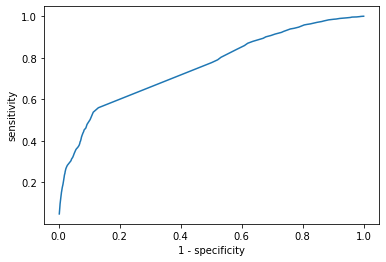

In [17]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [18]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.46

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(class_host, prob_pred_train[:, 1])

0.7625002389019593

#### train sensitivity

In [21]:
train_pred = np.zeros([num_train, ])
train_pred[prob_pred_train[:,1] > 0.46] = 1

In [22]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((train_pred==1), (class_host==1)))
num_false_pos = np.sum(np.logical_and((train_pred==1),(class_host==0)))
num_false_neg = np.sum(np.logical_and((train_pred==0),(class_host==1)))
num_true_neg = np.sum(np.logical_and((train_pred==0),(class_host==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.1826367090698827
recall for hospitalization:  0.5594635627530364
2211
9895
1741
66153


In [23]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.5594635627530364
specificity for hospitalization:  0.8698848095939407


### prediction of test

In [ ]:
X_test_symptom = np.zeros([num_test, num_symptom])
for i in range(num_test):
  t_symptom = np.zeros([num_symptom, ])
  t_symptom[test_symptoms[i].astype('int')] = 1
  X_test_symptom[i, :] = t_symptom

# convert to pca
z_test_symptom = spca.transform(X_test_symptom)


In [ ]:
class_pred = lr.predict(z_test_symptom)
prob_pred = lr.predict_proba(z_test_symptom)
class_test = np.zeros([num_test, ])
class_test[test_num_hospitalized_day > 0] = 1

#### plot roc curve

In [ ]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_test, ])
  temp_pred_class[prob_pred[:, 1] > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (test_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(test_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

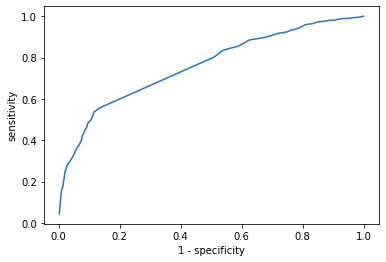

In [ ]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [ ]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.46

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test_class, prob_pred[:, 1])

0.7660188066892274

### prediction output

In [ ]:
class_pred = np.zeros([num_test, ])
class_pred[prob_pred[:,1] > 0.46] = 1

In [ ]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((class_pred==1), (class_test==1)))
num_false_pos = np.sum(np.logical_and((class_pred==1),(class_test==0)))
num_false_neg = np.sum(np.logical_and((class_pred==0),(class_test==1)))
num_true_neg = np.sum(np.logical_and((class_pred==0),(class_test==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.17303683113273105
recall for hospitalization:  0.5570469798657718
747
3570
594
22894


In [ ]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.5570469798657718
specificity for hospitalization:  0.8650997581620314


# sparse naive bayes extract important features


https://arxiv.org/pdf/1905.09884.pdf

In [42]:
# generate index of hospitalized / nonhospitalized
# index - hospitalized
ind_1 = np.argwhere(train_num_hospitalized_day).reshape(-1)
# index - no hospitalization
ind_0 = np.argwhere(train_num_hospitalized_day == 0).reshape(-1)


In [43]:
# generate feature of hospitalization
# equation page 2, data setup 
func_1 = np.zeros([num_symptom, ])
func_0 = np.zeros([num_symptom, ])

for i in ind_0:
  func_0[train_symptoms[i].astype('int')] += 1

for i in ind_1:
  func_1[train_symptoms[i].astype('int')] += 1


In [44]:
# naive bayes, bernoulli
# page 4 equation (9) (10)
# include laplace smoothing
v = (func_0 + func_1) * np.log((func_0 + func_1 + 1)/(num_train + 2)) + (num_train - func_0 - func_1) * np.log(1 - (func_0 + func_1 + 1)/(num_train+2))
num_1 = ind_1.shape[0]
num_0 = ind_0.shape[0]
w_1 = func_1 * np.log((func_1+1) / (num_1+2)) + (num_1 - func_1) * np.log(1 - (func_1+1) / (num_1+2))
w_0 = func_0 * np.log((func_0+1) / (num_0+2)) + (num_0 - func_0) * np.log(1 - (func_0+1) / (num_0+2))
w = w_0 + w_1

det_wv = w - v

In [80]:
# find the num_symptom - main_symptom smallest index
k_symptoms = 10
# index of not important symptoms
ind_nk = np.argpartition(det_wv, num_symptom - k_symptoms)
ind_nk = ind_nk[:(num_symptom - k_symptoms)]
# index of important symptoms
ind_k = np.argpartition(-det_wv, k_symptoms)
ind_k = ind_k[:k_symptoms]

# weight of hospitalization - give hospitalized, the probability that a specific symptom exists in patient
theta_1 = np.zeros([num_symptom, ])
theta_1[ind_k] = (func_1[ind_k]+1) / (num_1+2)
theta_1[ind_nk] = (func_1[ind_nk] + func_0[ind_nk] + 1) / (num_train+2)

# weight of not hospitalization
theta_0 = np.zeros([num_symptom, ])
theta_0[ind_k] = (func_0[ind_k]+1) / (num_0+2)
theta_0[ind_nk] = (func_1[ind_nk] + func_0[ind_nk]+1) / (num_train+2)

In [81]:
# find the top 20 symptoms that leads to hospitalization
num_main_symptom = 20
# index of top weights
ind_m = np.argpartition(-np.abs(theta_0), num_main_symptom)
ind_m = ind_m[:num_main_symptom]

determinant_symptoms = []
for i in range(num_main_symptom):
  for symptom, ind_symptom in symptom_dict.items():
    if ind_symptom == ind_m[i]:
      # print(symptom)
      determinant_symptoms.append(symptom)
print(determinant_symptoms)

['Chills', 'Dyspnoea', 'Injection site pain', 'Pain', 'Injection site swelling', 'Nausea', 'Rash', 'Arthralgia', 'Injection site erythema', 'Myalgia', 'Dizziness', 'Fatigue', 'Pain in extremity', 'Pyrexia', 'Headache', 'Pruritus', 'Vomiting', 'Paraesthesia', 'Injection site pruritus', 'Asthenia']


'Headache', 

'Chills', 

'Pyrexia', 

'Fatigue', 

'Pruritus', 

'Nausea', 

'Arthralgia', 

'Pain in extremity', 

'Dizziness', 

'Pain', 

'Injection site erythema', 

'Injection site pain', 

'Myalgia', 

'Injection site swelling', 

'Dyspnoea', 

'Rash', 

'Vomiting', 

'Asthenia', 

'Injection site pruritus', 

'Paraesthesia'

### prediction

#### train

In [101]:
pred_class = np.zeros([num_train, ])
pred_prob = np.zeros([num_train, ])  # probability of hospitalization
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = train_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  pred_prob[i] = py1/(py0+py1)

In [102]:
# test
train_class = np.zeros([num_train, ])
train_class[train_num_hospitalized_day > 0] = 1

In [103]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_train, ])
  temp_pred_class[pred_prob > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (train_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(train_class==0)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(train_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(train_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(train_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)

Text(0, 0.5, 'sensitivity')

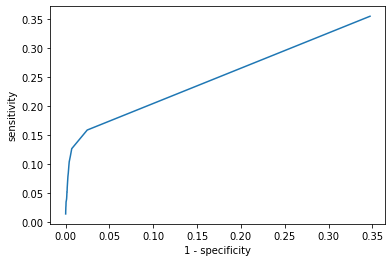

In [104]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [105]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.03

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_class, pred_prob)

0.5327199674151037

In [107]:
pred_class = np.zeros([num_train, ])
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = train_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  
  if py1/(py0+py1) > 0.03:
    pred_class[i] = 1


In [108]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((pred_class==1), (train_class==1)))
num_false_pos = np.sum(np.logical_and((pred_class==1),(train_class==0)))
num_false_neg = np.sum(np.logical_and((pred_class==0),(train_class==1)))
num_true_neg = np.sum(np.logical_and((pred_class==0),(train_class==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.24940143655227454
recall for hospitalization:  0.15814777327935223
625
1881
3327
74167


In [109]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.15814777327935223
specificity for hospitalization:  0.9752656217126026


#### find best cut off

In [110]:
pred_class = np.zeros([num_test, ])
pred_prob = np.zeros([num_test, ])  # probability of hospitalization
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = test_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  pred_prob[i] = py1/(py0+py1)

In [111]:
# test
test_class = np.zeros([num_test, ])
test_class[test_num_hospitalized_day > 0] = 1

In [112]:
# compute ROC curve
cut_off_thresh = np.array(range(0, 100))
cut_off_thresh.astype('float')
cut_off_thresh = cut_off_thresh / 100.0

val_sensitivity = np.zeros([100, ])
val_specifity = np.zeros([100, ])

for i in range(100):
  temp_thresh = cut_off_thresh[i]
  temp_pred_class = np.zeros([num_test, ])
  temp_pred_class[pred_prob > cut_off_thresh[i]] = 1

  # compute recall (true positive / (true positive + false positive))
  num_true_pos = np.sum(np.logical_and((temp_pred_class==1), (test_class==1)))
  num_false_pos = np.sum(np.logical_and((temp_pred_class==1),(test_class==0)))
  num_false_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==1)))
  num_true_neg = np.sum(np.logical_and((temp_pred_class==0),(test_class==0)))

  val_sensitivity[i] = num_true_pos/(num_true_pos + num_false_neg)
  val_specifity[i] = num_true_neg/(num_true_neg + num_false_pos)




Text(0, 0.5, 'sensitivity')

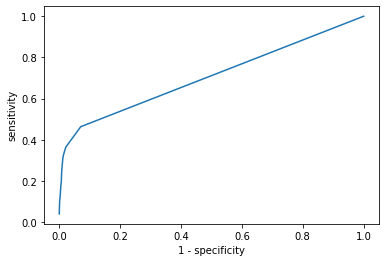

In [113]:
# plot ROC curve
plt.plot(1-val_specifity, val_sensitivity)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [114]:
temp = val_sensitivity + val_specifity - 1
cut_off_thresh[np.argmax(temp)]

0.03

#### inherent roc

In [115]:
from sklearn.metrics import roc_auc_score

In [116]:
roc_auc_score(test_class, pred_prob)

0.7330423607560638

#### result

In [117]:
pred_class = np.zeros([num_test, ])
p_y1 = num_1 / num_train

for i in range(num_test):
  ind_1 = test_symptoms[i].astype('int')
  ind_0 = np.array(range(num_symptom))
  ind_0 = np.delete(ind_0, ind_1)
  py1 = np.exp(np.sum(np.log(theta_1[ind_1])) + np.sum(np.log(1 - theta_1[ind_0]))) * p_y1
  py0 = np.exp(np.sum(np.log(theta_0[ind_1])) + np.sum(np.log(1 - theta_0[ind_0]))) * (1 - p_y1)
  
  if py1/(py0+py1) > 0.03:
    pred_class[i] = 1

# test
test_class = np.zeros([num_test, ])
test_class[test_num_hospitalized_day > 0] = 1



In [118]:
# compute recall (true positive / (true positive + false positive))
num_true_pos = np.sum(np.logical_and((pred_class==1), (test_class==1)))
num_false_pos = np.sum(np.logical_and((pred_class==1),(test_class==0)))
num_false_neg = np.sum(np.logical_and((pred_class==0),(test_class==1)))
num_true_neg = np.sum(np.logical_and((pred_class==0),(test_class==0)))

print('precision for hospitalization: ', num_true_pos/(num_true_pos + num_false_pos))
print('recall for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print(num_true_pos)
print(num_false_pos)
print(num_false_neg)
print(num_true_neg)

precision for hospitalization:  0.24840255591054314
recall for hospitalization:  0.4638329604772558
622
1882
719
24582


In [119]:
print('sensitivity for hospitalization: ', num_true_pos/(num_true_pos + num_false_neg))
print('specificity for hospitalization: ', num_true_neg/(num_true_neg + num_false_pos))

sensitivity for hospitalization:  0.4638329604772558
specificity for hospitalization:  0.9288845223700121


# entropy weighting K-means

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4262534

https://www.kdnuggets.com/2021/01/sparse-features-machine-learning-models.html

In [ ]:
n_sample = num_train
n_cluster = 6  # number of clusters
n_dim = num_symptom

# tolerance
val_tol = 1e-4
max_iter = 1e3

# give gamma
gamma = 0.5

# initialize lambda
k_lambda = np.ones([n_cluster, n_dim]) / n_dim
# initialize center
k_center = np.random.rand(n_cluster, n_dim)
# W maxtrix
W_mat = np.zeros([n_cluster, n_sample])



In [ ]:
# iteration
n_iter = 0
cur_obj_val = None
prev_obj_val = None

while ((prev_obj_val is None) or (np.abs(cur_obj_val - prev_obj_val) > val_tol)) and (n_iter < max_iter):
  prev_obj_val = cur_obj_val
  
  # update w
  for j in range(n_sample):
    weighted_dist = np.zeros([n_cluster, ])
    t_ind = train_symptoms[j].astype('int')
    t_ind_0 = np.array(range(n_dim))
    t_ind_0 = np.delete(t_ind_0, t_ind)
    for l in range(n_cluster):
      t_k_lambda = k_lambda[l, :]
      t_k_center = k_center[l, :]
      weighted_dist[l] = np.sum(t_k_lambda[t_ind] * ((t_k_center[t_ind] - 1) ** 2)) + np.sum(t_k_lambda[t_ind_0] * ((t_k_center[t_ind_0])**2))
    ind = np.argmin(weighted_dist)
    W_mat[ind, j] = 1
  
  # update center
  for l in range(n_cluster):
    temp_center_l = np.zeros([n_dim, ])
    for j in range(n_sample):
      t_ind = train_symptoms[j].astype('int')
      temp_center_l[t_ind] += W_mat[l, j]
    if np.sum(W_mat[l, :]) != 0:
      k_center[l, :] = temp_center_l / np.sum(W_mat[l, :])
    else:
      k_center[l, :] = np.zeros([n_dim, ])
  
  # update lambda
  temp_lambda = np.zeros([n_cluster, n_dim])
  for j in range(n_sample):
    t_k_center = k_center[l, :]
    t_ind = train_symptoms[j].astype('int')
    t_ind_0 = np.array(range(n_dim))
    t_ind_0 = np.delete(t_ind_0, t_ind)
    for l in range(n_cluster):
      temp_lambda_l = np.zeros([n_dim, ])
      temp_lambda_l[t_ind] += W_mat[l, j] * ((t_k_center[t_ind] - 1)**2)
      temp_lambda_l[t_ind_0] += W_mat[l, j] * ((t_k_center[t_ind_0])**2)
      temp_lambda[l, :] += temp_lambda_l
  k_lambda = temp_lambda / np.sum(temp_lambda, axis = 1, keepdims=True)

  # compute objective function
  cur_obj_val = 0
  for j in range(n_sample):
    t_ind = train_symptoms[j].astype('int')
    t_ind_0 = np.array(range(n_dim))
    t_ind_0 = np.delete(t_ind_0, t_ind)
    for l in range(n_cluster):
      t_k_lambda = k_lambda[l, :]
      t_k_center = k_center[l, :]  
      cur_obj_val += np.sum(W_mat[l, j] * t_k_lambda[ind] * ((t_k_center[t_ind] - 1) ** 2)) + np.sum(W_mat[l, j] * t_k_lambda[t_ind_0] * ((t_k_center[t_ind_0])**2))
      cur_obj_val += gamma * np.sum(k_lambda[l, :] * np.log(k_lambda[l, :] + 1e-15)) / n_sample
  
  n_iter += 1
  print(n_iter)
  print('current objective function value:', cur_obj_val)

1
current objective function value: 5663.295733794748
2
current objective function value: 5663.859143997343
3
current objective function value: 5664.068146222704


KeyboardInterrupt: ignored

In [ ]:
save_path_W_mat = "/content/drive/My Drive/CS229 Project/W_mat.txt"
save_path_k_center = "/content/drive/My Drive/CS229 Project/k_center.txt"
save_path_k_lambda = "/content/drive/My Drive/CS229 Project/k_lambda.txt"
np.savetxt('save_path_W_mat', W_mat, fmt='%d')
np.savetxt('save_path_k_center', k_center, fmt='%d')
np.savetxt('save_path_k_lambda', k_lambda, fmt='%d')

(5581,)


In [ ]:
b = np.loadtxt('test1.txt', dtype=int)

In [ ]:
n_sample


IndexError: ignored